In [1]:
# Andrej Baranovskij, http://katanaml.io/
# https://scikit-learn.org/stable/datasets/index.html

# Importing the libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Importing the Boston Housing dataset
from sklearn.datasets import load_boston

In [2]:
# Loading the Boston Housing dataset
boston = load_boston()

In [3]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [4]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names

In [5]:
#Adding target variable to dataframe
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#Check the shape of dataframe
data.shape

(506, 14)

In [7]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [8]:
# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(data, test_size=0.2, random_state = 1)
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [9]:
# Helper functions
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def format_output(data):
    y1 = data.pop('PRICE')
    y1 = np.array(y1)
    y2 = data.pop('PTRATIO')
    y2 = np.array(y2)
    return y1, y2

In [10]:
# Get Y1 and Y2 as the 2 outputs and format them as np arrays
# PTRATIO - pupil-teacher ratio by town
train_stats = train.describe()
train_stats.pop('PRICE')
train_stats.pop('PTRATIO')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)
val_Y = format_output(val)

In [11]:
# Normalize the training and test data
norm_train_X = np.array(norm(train))
norm_test_X = np.array(norm(test))
norm_val_X = np.array(norm(val))

In [44]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(len(train .columns),))
    first_dense = Dense(units='128', activation='relu')(input_layer)
    # Y1 output will be fed from the first dense
    y1_output = Dense(units='1', name='price_output')(first_dense)

    second_dense = Dense(units='128', activation='relu')(first_dense)
    # Y2 output will be fed from the second dense
    y2_output = Dense(units='1', name='ptratio_output')(second_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [45]:
model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'price_output': 'mse', 'ptratio_output': 'mse'},
              metrics={'price_output': tf.keras.metrics.RootMeanSquaredError(),
                       'ptratio_output': tf.keras.metrics.RootMeanSquaredError()})

In [46]:
# Train the model for 200 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=100, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/100
33/33 [==============================] - 0s 4ms/step - loss: 501.8174 - price_output_loss: 357.7544 - ptratio_output_loss: 144.0631 - price_output_root_mean_squared_error: 18.9144 - ptratio_output_root_mean_squared_error: 12.0026 - val_loss: 170.1374 - val_price_output_loss: 146.4134 - val_ptratio_output_loss: 23.7240 - val_price_output_root_mean_squared_error: 12.1001 - val_ptratio_output_root_mean_squared_error: 4.8707
Epoch 2/100
33/33 [==============================] - 0s 1ms/step - loss: 78.8823 - price_output_loss: 66.6783 - ptratio_output_loss: 12.2040 - price_output_root_mean_squared_error: 8.1657 - ptratio_output_root_mean_squared_error: 3.4934 - val_loss: 58.4486 - val_price_output_loss: 50.3622 - val_ptratio_output_loss: 8.0864 - val_price_output_root_mean_squared_error: 7.0966 - val_ptratio_output_root_mean_squared_error: 2.8437
Epoch 3/100
33/33 [==============================] - 0s 1ms/step - loss: 40.68

In [47]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'price_loss: {Y1_loss}')
print(f'ptratio_loss: {Y2_loss}')
print(f'price_rmse: {Y1_rmse}')
print(f'ptratio_rmse: {Y2_rmse}')

3/3 [==============================] - 0s 1ms/step - loss: 14.6836 - price_output_loss: 12.5121 - ptratio_output_loss: 2.1715 - price_output_root_mean_squared_error: 3.5372 - ptratio_output_root_mean_squared_error: 1.4736

loss: 14.68356704711914
price_loss: 12.51208209991455
ptratio_loss: 2.17148494720459
price_rmse: 3.5372421741485596
ptratio_rmse: 1.4735959768295288


In [48]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

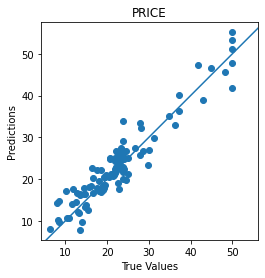

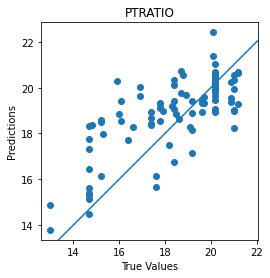

In [49]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='PRICE')
plot_diff(test_Y[1], Y_pred[1], title='PTRATIO')

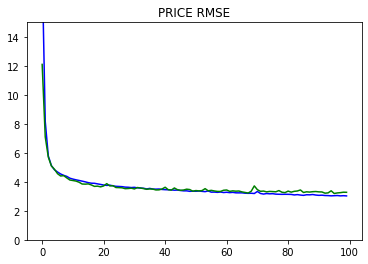

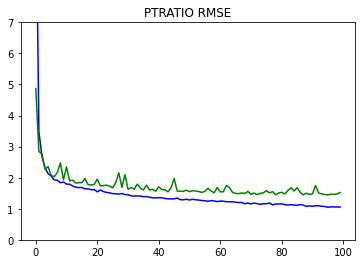

In [50]:
# Plot RMSE
plot_metrics(metric_name='price_output_root_mean_squared_error', title='PRICE RMSE', ylim=15)
plot_metrics(metric_name='ptratio_output_root_mean_squared_error', title='PTRATIO RMSE', ylim=7)

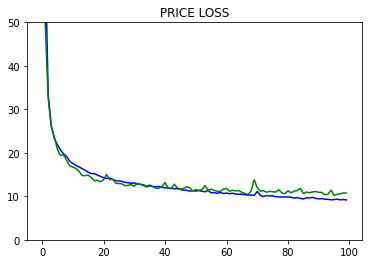

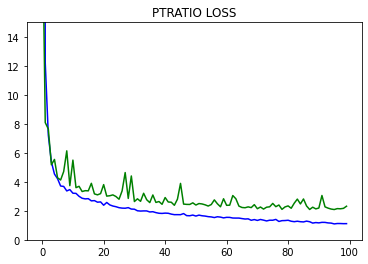

In [51]:
# Plot loss
plot_metrics(metric_name='price_output_loss', title='PRICE LOSS', ylim=50)
plot_metrics(metric_name='ptratio_output_loss', title='PTRATIO LOSS', ylim=15)

In [52]:
# Save model
model.save('./model_boston/', save_format='tf')

INFO:tensorflow:Assets written to: ./model_boston/assets


In [53]:
# Restore model
loaded_model = tf.keras.models.load_model('./model_boston/')

In [54]:
# Run predict with restored model
predictions = loaded_model.predict(norm_test_X)
price_pred = predictions[0]
ptratio_pred = predictions[1]